# Anaemia Prediction from Image Pixels and Hemoglobin Levels

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRM5FeTcchHt1KBkKJvuW5B1j_NxRS_vRwA9MrNjTmIvbnA-YtvIFFACYgQZoZ9iZj6rXw&usqp=CAU" style="height:300px" />

Anaemia is a condition characterized by a deficiency in the number or quality of red blood cells, leading to reduced oxygen transport throughout the body. This notebook aims to predict anaemia using a dataset that combines hemoglobin levels with color pixel distribution from related images.


## Import Libraries

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read Data📚**

In [142]:
anaemia  = pd.read_csv('output.csv')

In [143]:
anaemia.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No


**Change columns name**

In [144]:
anaemia = anaemia.rename(columns = {'%Red Pixel':'Red Pixel', '%Green pixel':'Green pixel', '%Blue pixel':'Blue pixel'},)
anaemia.head()

,Number,Sex,Red Pixel,Green pixel,Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No


In [145]:
anaemia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Number       104 non-null    int64  
 1   Sex          104 non-null    object 
 2   Red Pixel    104 non-null    float64
 3   Green pixel  104 non-null    float64
 4   Blue pixel   104 non-null    float64
 5   Hb           104 non-null    float64
 6   Anaemic      104 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.8+ KB


In [146]:
anaemia.describe()

,Number,Red Pixel,Green pixel,Blue pixel,Hb
count,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,45.654175,28.875507,25.470325,12.150962
std,30.166206,2.816294,1.554275,1.984671,2.512957
min,1.000000,38.796800,25.140300,19.541300,2.800000
25%,26.750000,43.911375,27.871300,24.896425,10.650000
50%,52.500000,45.385350,28.948750,25.953200,12.600000
75%,78.250000,46.968325,29.887275,26.721600,14.000000
max,104.000000,54.647800,32.368100,29.841400,16.300000


## Checking For Missing Values

In [147]:
anaemia.isna().sum()

Number         0
Sex            0
Red Pixel      0
Green pixel    0
Blue pixel     0
Hb             0
Anaemic        0
dtype: int64

There are no missing values in our dataset

# Feature Engineering

In [148]:
anaemia.groupby('Sex')['Anaemic'].value_counts()

Sex  Anaemic
F    No         16
     Yes        10
F    No         16
     Yes         7
M    No         24
     Yes         2
M    No         22
     Yes         7
Name: count, dtype: int64

In [149]:
anaemia['Sex'].unique()

array(['M', 'F', 'F ', 'M '], dtype=object)

**Replace 'M ' to 'M' and 'F ' to 'F'**

In [150]:
anaemia['Sex'] = anaemia['Sex'].replace('M ', 'M')
anaemia['Sex'] = anaemia['Sex'].replace('F ', 'F')


In [151]:
anaemia['Sex'].unique()

array(['M', 'F'], dtype=object)

In [152]:
anaemia.groupby('Sex')['Anaemic'].value_counts()

Sex  Anaemic
F    No         32
     Yes        17
M    No         46
     Yes         9
Name: count, dtype: int64

In [153]:
anaemia['Anaemic'].unique()

array(['Yes', 'No'], dtype=object)

# Data Visualization

**Anemic**

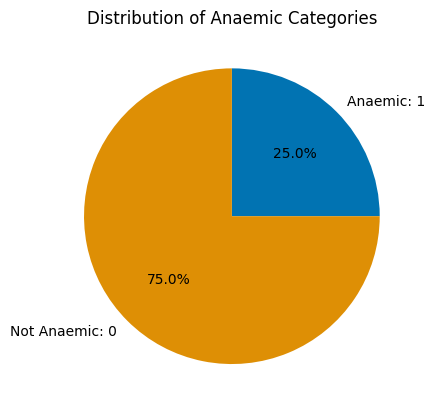

In [154]:
counts = anaemia.Anaemic.value_counts().reindex(['Yes','No'])
label = ['Anaemic: 1', 'Not Anaemic: 0']
plt.pie(x=counts, labels=label, autopct='%1.1f%%', colors=sns.color_palette('colorblind'))
plt.title('Distribution of Anaemic Categories')
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

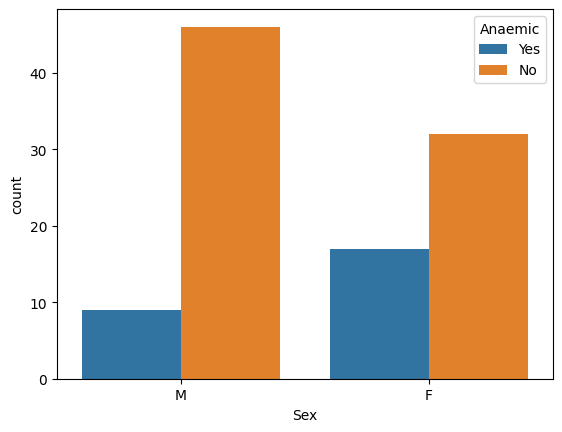

In [155]:
sns.countplot(x = 'Sex', data = anaemia, hue = 'Anaemic')

**Distribution of Hemoglobin Levels (Hb)**

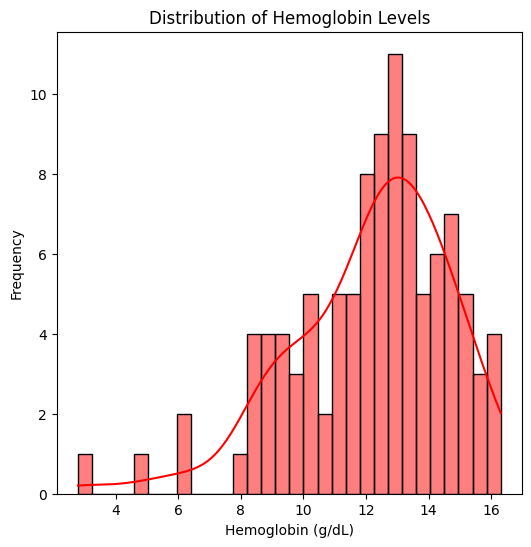

In [186]:
anaemia_clean = anaemia.copy()
anaemia_clean['Hb'] = np.where(np.isinf(anaemia_clean['Hb']), np.nan, anaemia_clean['Hb'])
# Create the histogram
plt.figure(figsize=(6,6))
sns.histplot(anaemia_clean['Hb'], kde=True, bins=30, color='red')
plt.title('Distribution of Hemoglobin Levels')
plt.xlabel('Hemoglobin (g/dL)')
plt.ylabel('Frequency')
plt.show()

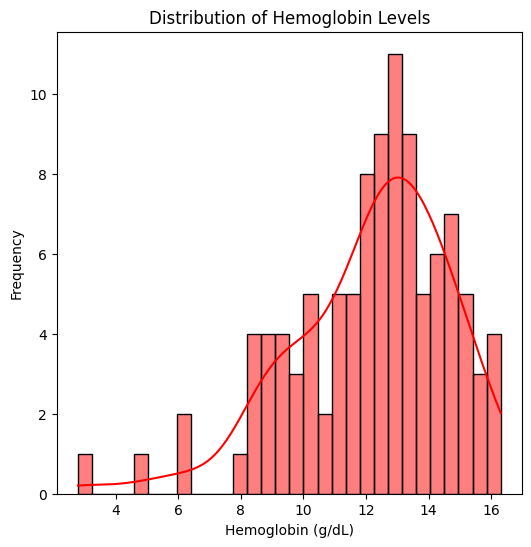

In [156]:
plt.figure(figsize=(6,6))
sns.histplot(anaemia['Hb'], kde=True, bins=30, color='red')
plt.title('Distribution of Hemoglobin Levels')
plt.xlabel('Hemoglobin (g/dL)')
plt.ylabel('Frequency')
plt.show()

**Red Pixel**

<Axes: xlabel='Red Pixel', ylabel='Count'>

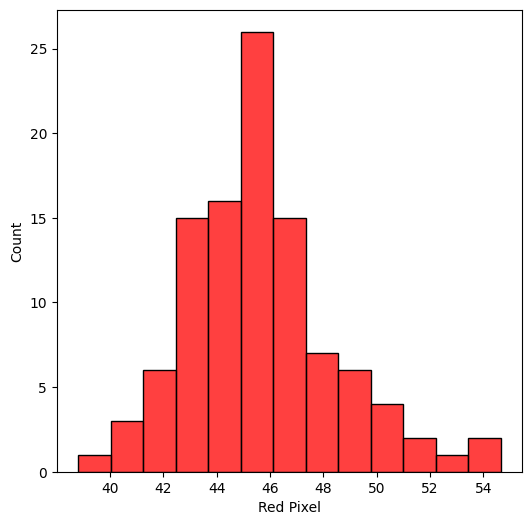

In [157]:
plt.figure(figsize=(6,6))
sns.histplot(data = anaemia , x ="Red Pixel" , color='Red')

<Axes: xlabel='Red Pixel', ylabel='Hb'>

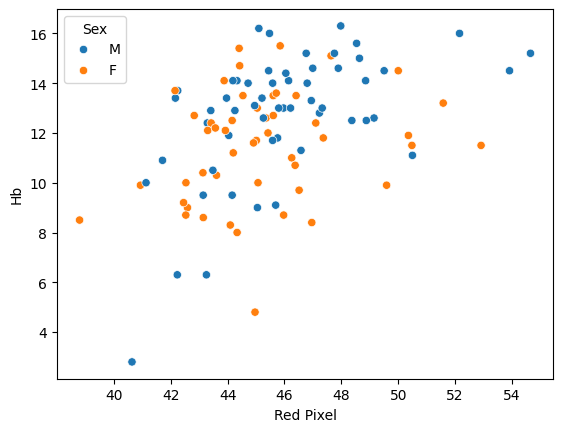

In [158]:
sns.scatterplot(x='Red Pixel',y='Hb',hue='Sex',data=anaemia, color='purple')

**Green Pixe**

<Axes: xlabel='Green pixel', ylabel='Count'>

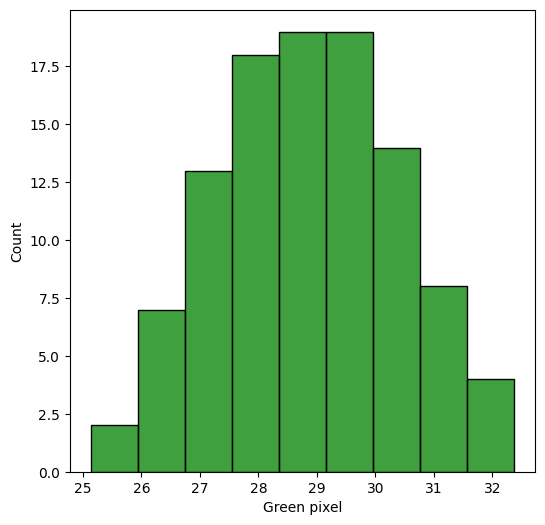

In [159]:
plt.figure(figsize=(6,6))
sns.histplot(data = anaemia , x ="Green pixel" , color='Green')

<Axes: xlabel='Green pixel', ylabel='Hb'>

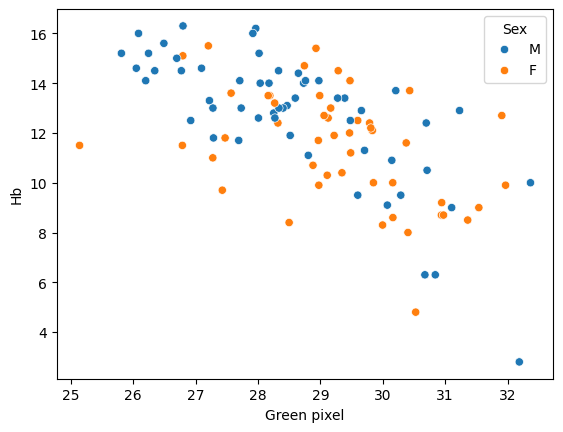

In [160]:
sns.scatterplot(x='Green pixel',y='Hb',hue='Sex',data=anaemia, color='red')

**Blue Pixel**

<Axes: xlabel='Blue pixel', ylabel='Count'>

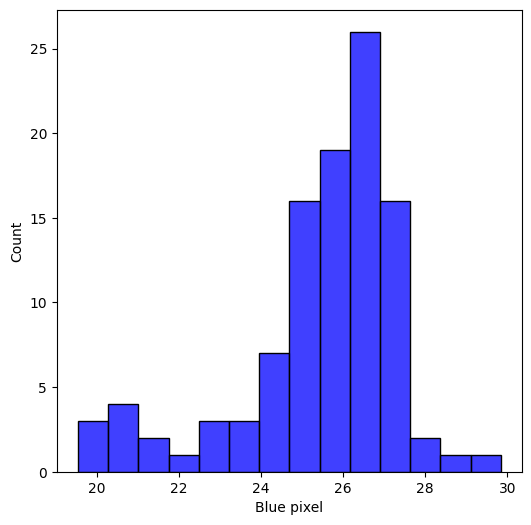

In [161]:
plt.figure(figsize=(6,6))
sns.histplot(data = anaemia , x ="Blue pixel" , color='Blue')

<Axes: xlabel='Blue pixel', ylabel='Hb'>

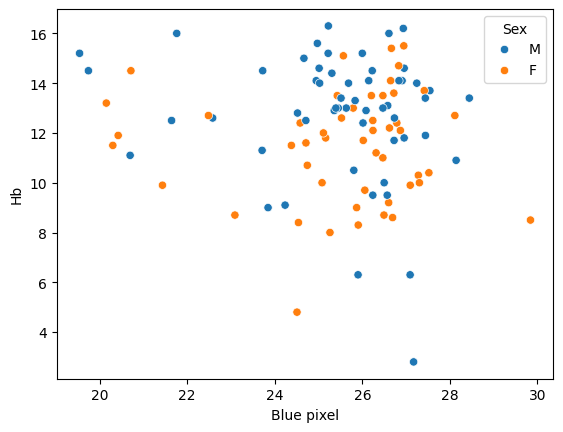

In [162]:
sns.scatterplot(x='Blue pixel',y='Hb',hue='Sex',data=anaemia, color='blue')


**Pixels colors scattered VS case Number**

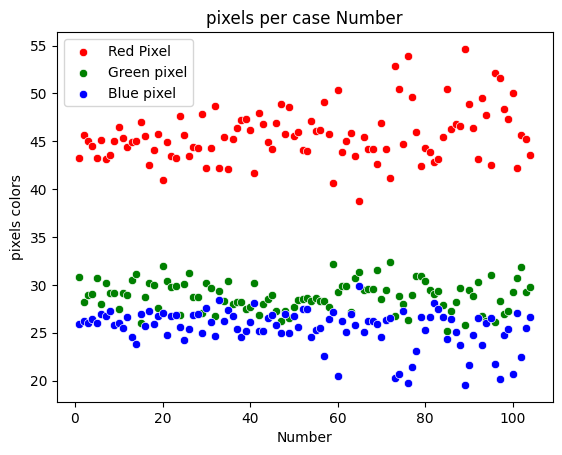

In [163]:
hist = sns.scatterplot(data = anaemia , x ="Number", y="Red Pixel",color = 'Red', label="Red Pixel")

sns.scatterplot(data = anaemia , x ="Number", y="Green pixel",color = 'Green', label="Green pixel")

sns.scatterplot(data = anaemia , x ="Number", y="Blue pixel",color = 'Blue', label="Blue pixel")

hist.set(xlabel='Number', ylabel='pixels colors', title='pixels per case Number')

plt.legend()
plt.show()

# Correlation Analysis

**Converting Object to int**

In [164]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
anaemia.Sex = le.fit_transform(anaemia.Sex)
anaemia.Anaemic = le.fit_transform(anaemia.Anaemic)

In [165]:
anaemia.head()

,Number,Sex,Red Pixel,Green pixel,Blue pixel,Hb,Anaemic
0,1,1,43.2555,30.8421,25.9025,6.3,1
1,2,0,45.6033,28.1900,26.2067,13.5,0
2,3,0,45.0107,28.9677,26.0215,11.7,0
3,4,0,44.5398,28.9899,26.4703,13.5,0
4,5,1,43.2870,30.6972,26.0158,12.4,0


<Axes: >

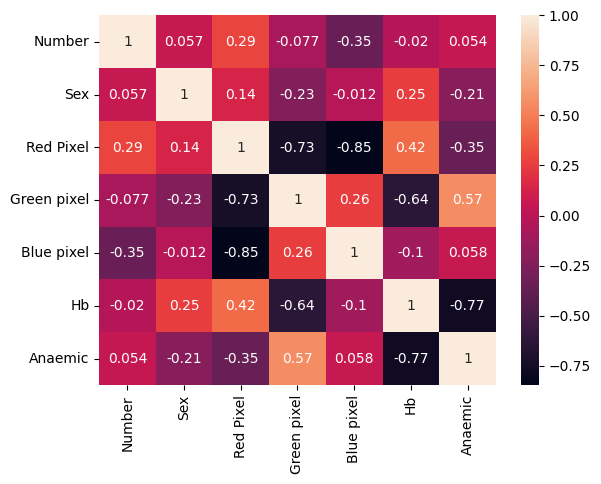

In [166]:
sns.heatmap(anaemia .corr(), annot=True)

[Text(0.5, 0, 'Hb'),
 Text(0, 0.5, 'Box Plot of Hb'),
 Text(0.5, 1.0, 'Hemoglobin level')]

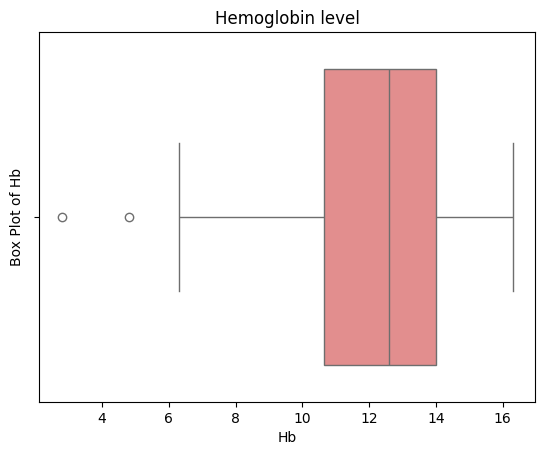

In [167]:
plot = sns.boxplot(x= anaemia['Hb'],color='lightcoral')
plot.set(xlabel='Hb', ylabel='Box Plot of Hb',title='Hemoglobin level')

### Hemoglobin Level Distribution - Box Plot

The box plot above illustrates the distribution of hemoglobin levels (Hb) among individuals in the dataset. Key observations:

- The **box** represents the interquartile range (IQR), with most hemoglobin levels ranging between **10** and **14 g/dL**.
- The **median**, or the middle value, is around **13 g/dL**, indicating that half of the individuals have hemoglobin levels below this value, and the other half have levels above it.
- The **whiskers** extend to the minimum and maximum values, suggesting that most data points fall within a reasonable range.
- **Outliers** (represented by circles) are present below **6 g/dL**, indicating some individuals have significantly low hemoglobin levels, potentially signaling severe anemia.

This plot provides a clear visual representation of the hemoglobin levels in the dataset and highlights potential outliers for further investigation.


**Cleaning Hb data**

In [168]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = anaemia['Hb'].quantile(0.25)
Q3 = anaemia['Hb'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_cleaned = anaemia[(anaemia['Hb'] >= lower_bound) & (anaemia['Hb'] <= upper_bound)]

# Display the cleaned data
print("Data with outliers removed:")
print(df_cleaned.describe())

Data with outliers removed:
           Number         Sex   Red Pixel  Green pixel  Blue pixel  \
count  102.000000  102.000000  102.000000   102.000000  102.000000   
mean    52.823529    0.529412   45.710103    28.826821   25.463083   
std     30.200128    0.501599    2.798521     1.524949    1.994754   
min      1.000000    0.000000   38.796800    25.140300   19.541300   
25%     27.250000    0.000000   43.932625    27.777700   24.953725   
50%     52.500000    1.000000   45.431750    28.905900   25.953200   
75%     78.750000    1.000000   46.985575    29.832475   26.713175   
max    104.000000    1.000000   54.647800    32.368100   29.841400   

               Hb     Anaemic  
count  102.000000  102.000000  
mean    12.314706    0.235294  
std      2.238785    0.426277  
min      6.300000    0.000000  
25%     10.925000    0.000000  
50%     12.600000    0.000000  
75%     14.000000    0.000000  
max     16.300000    1.000000  


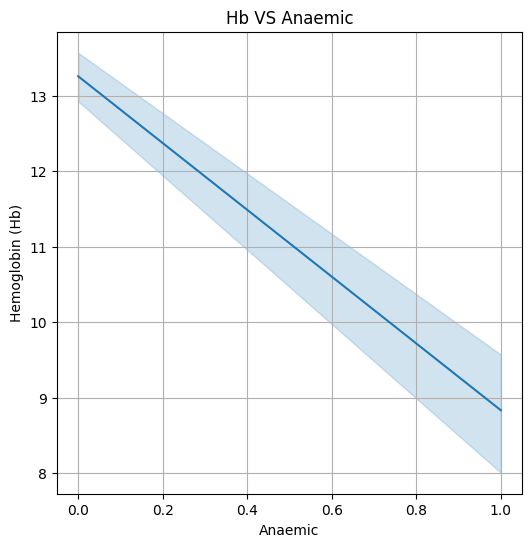

In [169]:
# Hb VS anaemic 
plt.figure(figsize=(6, 6))
sns.lineplot(x='Anaemic', y='Hb', data=anaemia)
plt.title('Hb VS Anaemic')
plt.xlabel('Anaemic')
plt.ylabel('Hemoglobin (Hb)')
plt.grid(True)
plt.show()

### Hb vs Anaemia Plot Analysis

This plot illustrates the relationship between **hemoglobin levels (Hb)** and **anaemia status**.

- **X-axis (Anaemic):** 
  - `0` indicates **Not Anaemic** (No).
  - `1` indicates **Anaemic** (Yes).

- **Y-axis (Hemoglobin Levels):** Displays the **Hb concentration** in grams per deciliter (g/dL).

### Key Insights:
- There is a **negative correlation** between hemoglobin levels and anaemia status. As the likelihood of being anaemic increases (`Anaemic = 1`), hemoglobin levels tend to decrease.
- For **non-anaemic individuals** (`Anaemic = 0`), the Hb levels are generally around **13 g/dL**.
- For **anaemic individuals** (`Anaemic = 1`), the Hb levels drop to around **9 g/dL**.
- The shaded region represents the **confidence interval** around the trend line, indicating the uncertainty in predictions.

This trend aligns with the medical definition of anaemia, where individuals with lower hemoglobin levels are classified as anaemic.


# Drop Unecesssary Columns

In [170]:
anaemia.drop('Number',axis=1,inplace=True)

## Data Pre-Processing

In [171]:
anaemia.head()

,Sex,Red Pixel,Green pixel,Blue pixel,Hb,Anaemic
0,1,43.2555,30.8421,25.9025,6.3,1
1,0,45.6033,28.1900,26.2067,13.5,0
2,0,45.0107,28.9677,26.0215,11.7,0
3,0,44.5398,28.9899,26.4703,13.5,0
4,1,43.2870,30.6972,26.0158,12.4,0


**Define Features X and Target y**

In [172]:
X = anaemia.drop('Anaemic',axis=1)
y = anaemia['Anaemic']

**Data Splitting**
* Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Model Building and Training

**Model Training**

In [175]:
from sklearn.linear_model import LinearRegression

In [176]:
model = LinearRegression()

In [177]:
model.fit(X_train, y_train)

LinearRegression()

In [178]:
model.coef_

array([ 4.87302101e-03,  2.12018355e+02,  2.12083747e+02,  2.12003242e+02,
       -1.17111890e-01])

**Model Prediction**

In [179]:
y_pred =model.predict(X_test)

**Model Evaluation**

In [180]:
model.score(X_test, y_test)

0.6053875894962909

**Print Mean Absolute Error (MAE) and Mean Squared Error(MSE)**

In [181]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 

In [182]:
print(f'Mean Absolute Error: {mean_absolute_error(y_test,y_pred)}')

Mean Absolute Error: 0.22140506874575294


In [183]:
print(f'Mean Squared Error: {mean_squared_error(y_test,y_pred)}')

Mean Squared Error: 0.06743864437319247
